## Modèle Log-Linéaire

Semblable aux modèles linéaires, sauf que le TS peut être représenté graphiquement par une fonction exponentielle. C'est-à-dire que la série temporelle a un taux de variation constant par rapport à chaque pas de temps.$$x_{t} = exp(a_0+a_1 t)$$$$log(x_{t}) = a_0+a_1 t$$$$x_0 = exp(a_0)$$$$x_t = x_{t-1}*exp(a1)$$

Par exemple, dans notre série simulée ci-dessus, si le cours de l'action augmente de X% à chaque pas de temps, vous obtenez une courbe qui ressemble à ceci :


In [2]:
import os
import sys
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

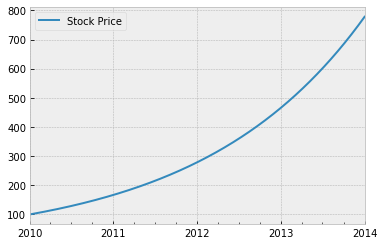

In [3]:
# Simulate exponential growth

idx = pd.date_range('2010-01-01', '2014-01-01', freq='D')
price = [np.exp( 4.605 + float(x)/712 ) for x in range(0, len(idx))]

# create dataframe and plot
df = pd.DataFrame(price, columns=['Stock Price'], index=idx)

with plt.style.context('bmh'):
    df.plot()

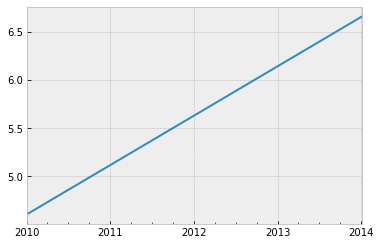

In [4]:
# log of prices

with plt.style.context('bmh'):
    pd.Series(np.log(price), index=idx).plot()

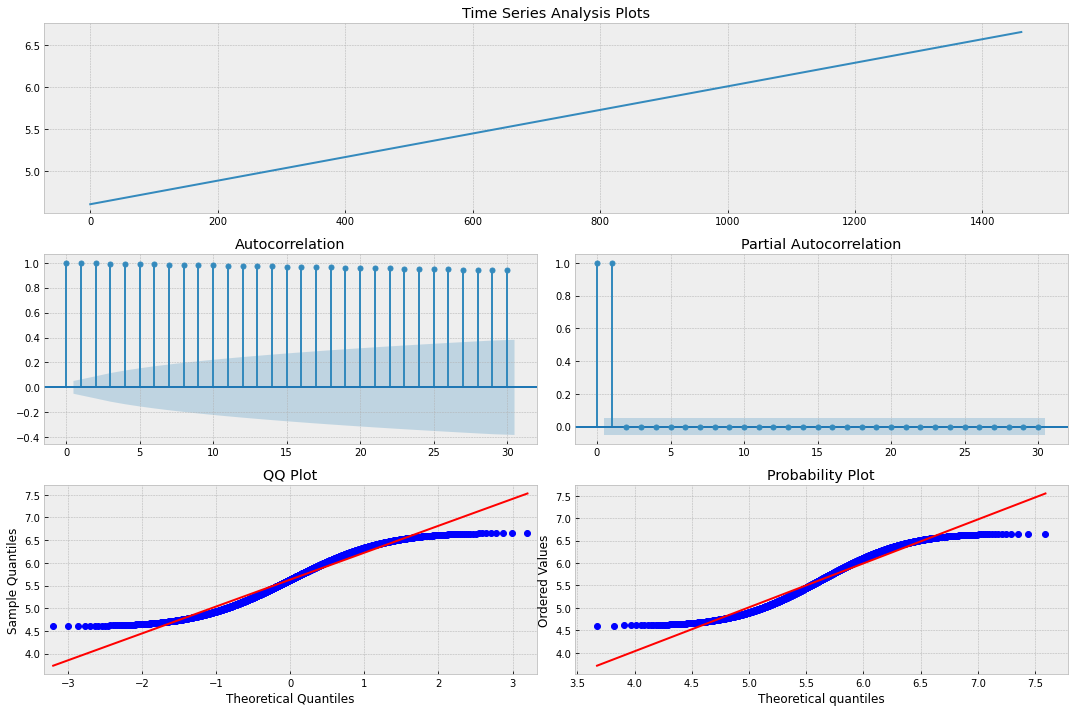

In [7]:
# tsplot definition

def tsplot(y, lags=None, figsize=(15, 10), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        fig = plt.figure(figsize=figsize)
        # mpl.rcParams['font.family'] = 'Ubuntu Mono'
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))

        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)

        plt.tight_layout()
    return

#log-linear model
_ = tsplot(np.log(price), lags=30)

Ce carnet donne un aperçu de base de l'analyse des séries chronologiques. Les tests de stationnarité, de marche aléatoire sont un processus commun que nous continuerons à visiter dans d'autres carnets. Nous parlerons ensuite de modèles de séries chronologiques plus sophistiqués.